In [1]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
import math, string, nltk, gensim, pandas
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = pandas.read_csv("wine-reviews/winemag-data-130k-v2.csv")
data = (data.drop_duplicates())
data = data.dropna(subset=['price'])

In [2]:
variety = set(data['variety'])
dic_variety = {r: i for r,i in zip(variety, range(len(variety)))}
varietyList = [dic_variety[x] for x in data["variety"]]

region = set(data['region_1'])
dic_region = {r: i for r,i in zip(region, range(len(region)))}
regionList = [dic_region[x] for x in data["region_1"]]

province = set(data['province'])
dic_province = {r: i for r,i in zip(province, range(len(province)))}
provinceList = [dic_province[x] for x in data["province"]]

winery = set(data['winery'])
dic_winery = {r: i for r,i in zip(winery, range(len(winery)))}
wineryList = [dic_winery[x] for x in data["winery"]]

In [3]:
#40 Seconds
countryData = defaultdict(list)
def cleanup(s):
    s = ''.join([i for i in s if not i.isdigit()])
    stopset = set(stopwords.words('english'))
    s = s.lower().split(' ')
    s = ' '.join([c for c in s if c not in string.punctuation])
    return s

priceData = defaultdict(list)
for x, y in data.iterrows():
    priceData[y['price']/10].append(cleanup(y['description']))
priceList = []
for x in priceData:
    priceList.append(' '.join(priceData[x]))

In [4]:
for x,y in data.iterrows():
    countryData[y['country']].append(cleanup(y['description']))

In [5]:
countryDataList = []
for x in countryData:
    countryDataList.append(' '.join(countryData[x]))

In [16]:
countryDataList = priceList

cv = TfidfVectorizer(min_df=1, stop_words='english')
trained = cv.fit_transform(countryDataList)
feature_names = cv.get_feature_names() 

In [20]:
dense = trained.todense()
# cluster number
country = dense[5].tolist()[0]
score = [pair for pair in zip(range(0, len(country)), country) if pair[1] > 0]

In [21]:
sorted_scores = sorted(score, key=lambda t: t[1] * -1)
d = {}
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_scores][:20]:
    d[phrase] = score    
    print('{0: <20} {1}'.format(phrase, score))

flavors              0.31266623789832976
wine                 0.28777905151097005
fruit                0.2126577423938582
palate               0.19968683513048413
aromas               0.1990886468520001
finish               0.19761297242549258
acidity              0.16412050342510187
dry                  0.1387484342683518
cherry               0.13624701866318623
ripe                 0.12539632076891516
tannins              0.11558269643254059
black                0.1139494647898159
light                0.11063819961625536
fresh                0.10861498848580671
apple                0.10823311246717125
drink                0.10756575866897336
notes                0.1053281574444711
oak                  0.10477505221498994
nose                 0.10306210858204731
red                  0.1030185727954416


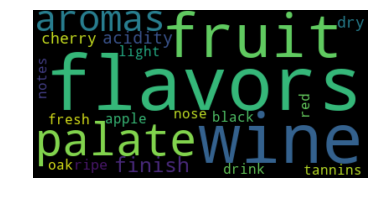

In [22]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from gensim import corpora, models
text = [x.split(' ') for x in countryDataList]
dictionary = corpora.Dictionary(texts)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=3, num_words=3))

In [ ]:
print(ldamodel.print_topics(num_topics=3, num_words=3))